In [1]:
import nso_ds_classes.nso_tif_kernel as nso_tif_kernel
import nso_ds_classes.nso_ds_models as nso_ds_models
import glob
import geopandas as gpd
import os
import pandas as pd
import numpy as np
from timeit import default_timer as timer

C:\ProgramData\Anaconda3\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.4.3-CAPI-1.8.3 r4285) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
Using TensorFlow backend.


In [2]:
# Set a kernel generator.
x_kernel_width = 32
y_kernel_height = 32


path_to_tif_file = "E:/data/coepelduynen/20210709_103835_SV1-01_SV_RD_11bit_RGBI_50cm_KatwijkAanZee_natura2000_coepelduynen_cropped_ndvi_height.tif"
tif_kernel_generator = nso_tif_kernel.nso_tif_kernel_generator(path_to_tif_file, x_kernel_width , y_kernel_height)

In [3]:
euclidean_distance_model = nso_ds_models.euclidean_distance_model(tif_kernel_generator, normalize = True)

In [4]:
euclidean_distance_model.set_ec_distance_custom_annotations()

C:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_tif_kernel.py:461: RuntimeWarning: invalid value encountered in true_divide
  return (data - np.min(data)) / (np.max(data) - np.min(data))


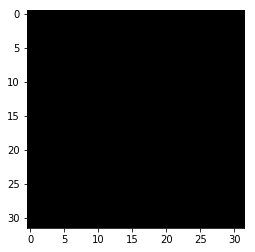

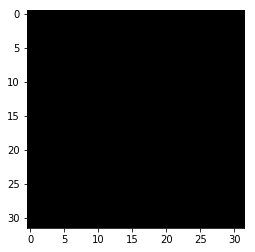

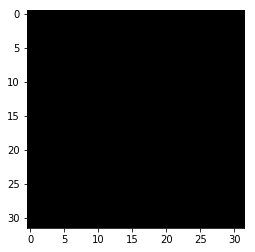

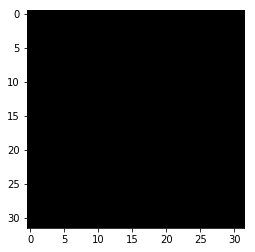

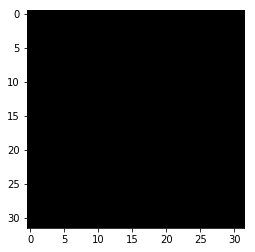

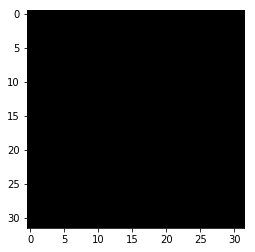

0    None
1    None
2    None
3    None
4    None
5    None
dtype: object

In [5]:
euclidean_distance_model.get_annotations().apply(lambda x:nso_tif_kernel.plot_kernel(x['kernel']), axis=1)

In [6]:
df = euclidean_distance_model.get_annotations()

In [7]:
df

,index,label,x_cor,y_cor,date,WGS84,wgs84_e,wgs84_n,geometry,rd_x,rd_y,kernel
0,15,bos,NaN,NaN,20210709_103835_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4126771,52.2155951",4.4126771,52.2155951,POINT (88400.778 470170.004),4857,1784,"[[[0.673469387755102, 0.826530612244898, 0.846..."
1,16,Struweel,NaN,NaN,20210709_103835_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4077849,52.2141994",4.4077849,52.2141994,POINT (88064.362 470019.229),5159,1111,"[[[0.4297520661157025, 0.4132231404958678, 0.5..."
2,17,Hoog gras,NaN,NaN,20210709_103835_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4180538,52.2279366",4.4180538,52.2279366,POINT (88786.554 471538.131),2121,2556,"[[[0.41284403669724773, 0.47706422018348627, 0..."
3,18,Kort gras,NaN,NaN,20210709_103835_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4176069,52.2257919",4.4176069,52.2257919,POINT (88752.832 471299.931),2598,2488,"[[[0.330188679245283, 0.29245283018867924, 0.2..."
4,19,Bedekt,NaN,NaN,20210709_103835_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4081866,52.2186350",4.4081866,52.2186350,POINT (88098.475 470512.339),4173,1179,"[[[0.2760416666666667, 0.2604166666666667, 0.3..."
5,20,Kaal (zand),NaN,NaN,20210709_103835_SV1-01_SV_RD_11bit_RGBI_50cm_K...,"4.4172036,52.2262923",4.4172036,52.2262923,POINT (88726.023 471355.972),2486,2435,"[[[0.16393442622950818, 0.19672131147540983, 0..."


In [6]:
x_row = 50
y_row = 4757
kernel = tif_kernel_generator.get_kernel_for_x_y(x_row,y_row)

In [15]:
nso_tif_kernel.normalizedata(kernel)

array([[0.60301508, 0.53768844, 0.40201005, ..., 0.31658291, 0.54271357,
        0.40703518],
       [0.61306533, 0.57788945, 0.46231156, ..., 0.42211055, 0.65326633,
        0.49246231],
       [0.6281407 , 0.53768844, 0.50251256, ..., 0.51256281, 0.84422111,
        0.69849246],
       ...,
       [0.4321608 , 0.3919598 , 0.3919598 , ..., 0.29145729, 0.56281407,
        0.40201005],
       [0.31658291, 0.36180905, 0.4321608 , ..., 0.19095477, 0.54271357,
        0.44723618],
       [0.24120603, 0.37688442, 0.60301508, ..., 0.28140704, 0.45728643,
        0.45226131]])

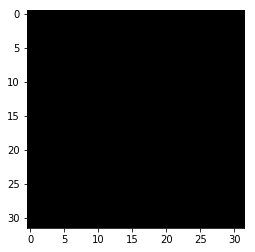

In [11]:
nso_tif_kernel.plot_kernel(tif_kernel_generator.normalize_tile_kernel(kernel))

In [28]:
nso_tif_kernel.normalizedata(kernel[0]).shape

(32, 32)

In [10]:
start = timer() 
np.argmin([nso_ds_models.euclidean_distance_kernels(x,kernel)  for x in df['kernel'].values])
print("Predict ends in: "+str(timer()-start)+" second(s)")

Predict ends in: 0.0011149999999986449 second(s)


In [7]:
start = timer() 
print(euclidean_distance_model.get_class_label(euclidean_distance_model.predict(nso_tif_kernel.normalizedata(kernel))))
print("Predict ends in: "+str(timer()-start)+" second(s)")

Kort gras
Predict ends in: 0.015148299999999892 second(s)


In [19]:
%prun -l 4 euclidean_distance_model.predict_np(kernel)

In [18]:
type(euclidean_distance_model.predict_np(kernel))

numpy.int64

In [7]:
for file in glob.glob("E:/data/coepelduynen/*.tif"):
    print("-------")
    print(file.replace("\\","/"))
    file = file.replace("\\","/") 
    tif_kernel_generator = nso_tif_kernel.nso_tif_kernel_generator(file, x_kernel_width , y_kernel_height)
    
    tif_kernel_generator.predict_all_output(euclidean_distance_model,"E:/output/Coepelduynen_segmentations/"+file.split("/")[-1].replace(".tif",".shp"))

-------
E:/data/coepelduynen/20190308_111644_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped.tif
-------
Part: 0 of 10
16
653


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [01:38<00:00,  5.85it/s]


E:/output/Coepelduynen_segmentations/20190308_111644_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_0.shp
-------
Part: 1 of 10
654
1291


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [08:47<00:00,  1.65s/it]


E:/output/Coepelduynen_segmentations/20190308_111644_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_1.shp
-------
Part: 2 of 10
1292
1929


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [20:36<00:00,  1.72s/it]


E:/output/Coepelduynen_segmentations/20190308_111644_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_2.shp
-------
Part: 3 of 10
1930
2567


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [17:52<00:00,  1.71s/it]


E:/output/Coepelduynen_segmentations/20190308_111644_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_3.shp
-------
Part: 4 of 10
2568
3205


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:00<00:00,  1.69s/it]


E:/output/Coepelduynen_segmentations/20190308_111644_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_4.shp
-------
Part: 5 of 10
3206
3843


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:14<00:00,  1.71s/it]


E:/output/Coepelduynen_segmentations/20190308_111644_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_5.shp
-------
Part: 6 of 10
3844
4481


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:24<00:00,  1.78s/it]


E:/output/Coepelduynen_segmentations/20190308_111644_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_6.shp
-------
Part: 7 of 10
4482
5119


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:50<00:00,  1.70s/it]


E:/output/Coepelduynen_segmentations/20190308_111644_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_7.shp
-------
Part: 8 of 10
5120
5757


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [12:34<00:00,  3.29it/s]


E:/output/Coepelduynen_segmentations/20190308_111644_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_8.shp
-------
Part: 9 of 10
5758
6382


100%|████████████████████████████████████████████████████████████████████████████████| 624/624 [05:20<00:00,  5.20it/s]


E:/output/Coepelduynen_segmentations/20190308_111644_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_9.shp
E:/output/Coepelduynen_segmentations\20190308_111644_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_0.shp
E:/output/Coepelduynen_segmentations\20190308_111644_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_1.shp
Append
E:/output/Coepelduynen_segmentations\20190308_111644_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_2.shp
Append
E:/output/Coepelduynen_segmentations\20190308_111644_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_3.shp
Append
E:/output/Coepelduynen_segmentations\20190308_111644_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_4.shp
Append
E:/output/Coepelduynen_segmentations\20190308_111644_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_5.shp
Append
E:/output/Coepelduynen_segmentatio

100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [01:36<00:00,  7.19it/s]


E:/output/Coepelduynen_segmentations/20190422_111335_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_0.shp
-------
Part: 1 of 10
654
1291


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [08:30<00:00,  1.61s/it]


E:/output/Coepelduynen_segmentations/20190422_111335_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_1.shp
-------
Part: 2 of 10
1292
1929


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [20:21<00:00,  1.74s/it]


E:/output/Coepelduynen_segmentations/20190422_111335_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_2.shp
-------
Part: 3 of 10
1930
2567


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [17:55<00:00,  1.68s/it]


E:/output/Coepelduynen_segmentations/20190422_111335_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_3.shp
-------
Part: 4 of 10
2568
3205


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [17:56<00:00,  1.69s/it]


E:/output/Coepelduynen_segmentations/20190422_111335_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_4.shp
-------
Part: 5 of 10
3206
3843


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:09<00:00,  1.70s/it]


E:/output/Coepelduynen_segmentations/20190422_111335_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_5.shp
-------
Part: 6 of 10
3844
4481


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:23<00:00,  1.77s/it]


E:/output/Coepelduynen_segmentations/20190422_111335_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_6.shp
-------
Part: 7 of 10
4482
5119


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:48<00:00,  1.71s/it]


E:/output/Coepelduynen_segmentations/20190422_111335_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_7.shp
-------
Part: 8 of 10
5120
5757


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [12:33<00:00,  3.33it/s]


E:/output/Coepelduynen_segmentations/20190422_111335_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_8.shp
-------
Part: 9 of 10
5758
6382


100%|████████████████████████████████████████████████████████████████████████████████| 624/624 [05:17<00:00,  5.20it/s]


E:/output/Coepelduynen_segmentations/20190422_111335_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_9.shp
E:/output/Coepelduynen_segmentations\20190422_111335_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_0.shp
E:/output/Coepelduynen_segmentations\20190422_111335_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_1.shp
Append
E:/output/Coepelduynen_segmentations\20190422_111335_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_2.shp
Append
E:/output/Coepelduynen_segmentations\20190422_111335_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_3.shp
Append
E:/output/Coepelduynen_segmentations\20190422_111335_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_4.shp
Append
E:/output/Coepelduynen_segmentations\20190422_111335_SV1-01_50cm_RD_11bit_RGBI_Oegstgeest_natura2000_coepelduynen_cropped_part_5.shp
Append
E:/output/Coepelduynen_segmentatio

100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [01:35<00:00,  7.40it/s]


E:/output/Coepelduynen_segmentations/20190601_105844_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_0.shp
-------
Part: 1 of 10
654
1291


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [08:28<00:00,  1.62s/it]


E:/output/Coepelduynen_segmentations/20190601_105844_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_1.shp
-------
Part: 2 of 10
1292
1929


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [20:18<00:00,  1.75s/it]


E:/output/Coepelduynen_segmentations/20190601_105844_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_2.shp
-------
Part: 3 of 10
1930
2567


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [17:52<00:00,  1.68s/it]


E:/output/Coepelduynen_segmentations/20190601_105844_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_3.shp
-------
Part: 4 of 10
2568
3205


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [17:55<00:00,  1.68s/it]


E:/output/Coepelduynen_segmentations/20190601_105844_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_4.shp
-------
Part: 5 of 10
3206
3843


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:11<00:00,  1.70s/it]


E:/output/Coepelduynen_segmentations/20190601_105844_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_5.shp
-------
Part: 6 of 10
3844
4481


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:22<00:00,  1.75s/it]


E:/output/Coepelduynen_segmentations/20190601_105844_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_6.shp
-------
Part: 7 of 10
4482
5119


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:47<00:00,  1.70s/it]


E:/output/Coepelduynen_segmentations/20190601_105844_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_7.shp
-------
Part: 8 of 10
5120
5757


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [12:32<00:00,  3.26it/s]


E:/output/Coepelduynen_segmentations/20190601_105844_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_8.shp
-------
Part: 9 of 10
5758
6382


100%|████████████████████████████████████████████████████████████████████████████████| 624/624 [05:16<00:00,  5.25it/s]


E:/output/Coepelduynen_segmentations/20190601_105844_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_9.shp
E:/output/Coepelduynen_segmentations\20190601_105844_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_0.shp
E:/output/Coepelduynen_segmentations\20190601_105844_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_1.shp
Append
E:/output/Coepelduynen_segmentations\20190601_105844_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_2.shp
Append
E:/output/Coepelduynen_segmentations\20190601_105844_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_3.shp
Append
E:/output/Coepelduynen_segmentations\20190601_105844_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_4.shp
Append
E:/output/Coepelduynen_segmentations\20190601_105844_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_5.shp
Append
E:/output/Coe

100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [01:35<00:00,  7.35it/s]


E:/output/Coepelduynen_segmentations/20191202_110525_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_0.shp
-------
Part: 1 of 10
654
1291


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [08:29<00:00,  1.63s/it]


E:/output/Coepelduynen_segmentations/20191202_110525_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_1.shp
-------
Part: 2 of 10
1292
1929


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [20:17<00:00,  1.72s/it]


E:/output/Coepelduynen_segmentations/20191202_110525_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_2.shp
-------
Part: 3 of 10
1930
2567


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [17:51<00:00,  1.67s/it]


E:/output/Coepelduynen_segmentations/20191202_110525_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_3.shp
-------
Part: 4 of 10
2568
3205


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [17:56<00:00,  1.69s/it]


E:/output/Coepelduynen_segmentations/20191202_110525_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_4.shp
-------
Part: 5 of 10
3206
3843


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:10<00:00,  1.70s/it]


E:/output/Coepelduynen_segmentations/20191202_110525_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_5.shp
-------
Part: 6 of 10
3844
4481


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:23<00:00,  1.77s/it]


E:/output/Coepelduynen_segmentations/20191202_110525_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_6.shp
-------
Part: 7 of 10
4482
5119


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:47<00:00,  1.71s/it]


E:/output/Coepelduynen_segmentations/20191202_110525_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_7.shp
-------
Part: 8 of 10
5120
5757


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [12:29<00:00,  3.35it/s]


E:/output/Coepelduynen_segmentations/20191202_110525_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_8.shp
-------
Part: 9 of 10
5758
6382


100%|████████████████████████████████████████████████████████████████████████████████| 624/624 [05:17<00:00,  5.03it/s]


E:/output/Coepelduynen_segmentations/20191202_110525_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_9.shp
E:/output/Coepelduynen_segmentations\20191202_110525_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_0.shp
E:/output/Coepelduynen_segmentations\20191202_110525_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_1.shp
Append
E:/output/Coepelduynen_segmentations\20191202_110525_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_2.shp
Append
E:/output/Coepelduynen_segmentations\20191202_110525_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_3.shp
Append
E:/output/Coepelduynen_segmentations\20191202_110525_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_4.shp
Append
E:/output/Coepelduynen_segmentations\20191202_110525_SV1-04_50cm_RD_11bit_RGBI_KatwijkAanZee_natura2000_coepelduynen_cropped_part_5.shp
Append
E:/output/Coe

100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [01:35<00:00,  7.29it/s]


E:/output/Coepelduynen_segmentations/20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_0.shp
-------
Part: 1 of 10
654
1291


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [08:28<00:00,  1.62s/it]


E:/output/Coepelduynen_segmentations/20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_1.shp
-------
Part: 2 of 10
1292
1929


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [20:15<00:00,  1.74s/it]


E:/output/Coepelduynen_segmentations/20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_2.shp
-------
Part: 3 of 10
1930
2567


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [17:52<00:00,  1.70s/it]


E:/output/Coepelduynen_segmentations/20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_3.shp
-------
Part: 4 of 10
2568
3205


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [17:56<00:00,  1.68s/it]


E:/output/Coepelduynen_segmentations/20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_4.shp
-------
Part: 5 of 10
3206
3843


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:15<00:00,  1.72s/it]


E:/output/Coepelduynen_segmentations/20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_5.shp
-------
Part: 6 of 10
3844
4481


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:24<00:00,  1.81s/it]


E:/output/Coepelduynen_segmentations/20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_6.shp
-------
Part: 7 of 10
4482
5119


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:52<00:00,  1.72s/it]


E:/output/Coepelduynen_segmentations/20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_7.shp
-------
Part: 8 of 10
5120
5757


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [12:35<00:00,  3.37it/s]


E:/output/Coepelduynen_segmentations/20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_8.shp
-------
Part: 9 of 10
5758
6382


100%|████████████████████████████████████████████████████████████████████████████████| 624/624 [05:18<00:00,  5.24it/s]


E:/output/Coepelduynen_segmentations/20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_9.shp
E:/output/Coepelduynen_segmentations\20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_0.shp
E:/output/Coepelduynen_segmentations\20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_1.shp
Append
E:/output/Coepelduynen_segmentations\20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_2.shp
Append
E:/output/Coepelduynen_segmentations\20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_3.shp
Append
E:/output/Coepelduynen_segmentations\20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_4.shp
Append
E:/output/Coepelduynen_segmentations\20200304_114601_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_5.shp
Append
E:/output/Coe

100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [01:35<00:00,  7.17it/s]


E:/output/Coepelduynen_segmentations/20200323_112115_SV1-03_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_0.shp
-------
Part: 1 of 10
654
1291


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [08:30<00:00,  1.62s/it]


E:/output/Coepelduynen_segmentations/20200323_112115_SV1-03_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_1.shp
-------
Part: 2 of 10
1292
1929


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [20:39<00:00,  1.74s/it]


E:/output/Coepelduynen_segmentations/20200323_112115_SV1-03_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_2.shp
-------
Part: 3 of 10
1930
2567


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:30<00:00,  2.06s/it]


E:/output/Coepelduynen_segmentations/20200323_112115_SV1-03_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_3.shp
-------
Part: 4 of 10
2568
3205


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:13<00:00,  1.71s/it]


E:/output/Coepelduynen_segmentations/20200323_112115_SV1-03_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_4.shp
-------
Part: 5 of 10
3206
3843


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:33<00:00,  1.72s/it]


E:/output/Coepelduynen_segmentations/20200323_112115_SV1-03_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_5.shp
-------
Part: 6 of 10
3844
4481


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:53<00:00,  1.81s/it]


E:/output/Coepelduynen_segmentations/20200323_112115_SV1-03_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_6.shp
-------
Part: 7 of 10
4482
5119


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [19:35<00:00,  2.11s/it]


E:/output/Coepelduynen_segmentations/20200323_112115_SV1-03_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_7.shp
-------
Part: 8 of 10
5120
5757


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [12:55<00:00,  3.20it/s]


E:/output/Coepelduynen_segmentations/20200323_112115_SV1-03_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_8.shp
-------
Part: 9 of 10
5758
6382


100%|████████████████████████████████████████████████████████████████████████████████| 624/624 [05:21<00:00,  5.07it/s]


E:/output/Coepelduynen_segmentations/20200323_112115_SV1-03_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_9.shp
E:/output/Coepelduynen_segmentations\20200323_112115_SV1-03_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_0.shp
E:/output/Coepelduynen_segmentations\20200323_112115_SV1-03_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_1.shp
Append
E:/output/Coepelduynen_segmentations\20200323_112115_SV1-03_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_2.shp
Append
E:/output/Coepelduynen_segmentations\20200323_112115_SV1-03_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_3.shp
Append
E:/output/Coepelduynen_segmentations\20200323_112115_SV1-03_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_4.shp
Append
E:/output/Coepelduynen_segmentations\20200323_112115_SV1-03_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_5.shp
Append
E:/output/Coe

100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [01:37<00:00,  7.11it/s]


E:/output/Coepelduynen_segmentations/20200326_114323_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_0.shp
-------
Part: 1 of 10
654
1291


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [08:43<00:00,  1.65s/it]


E:/output/Coepelduynen_segmentations/20200326_114323_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_1.shp
-------
Part: 2 of 10
1292
1929


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [20:51<00:00,  1.78s/it]


E:/output/Coepelduynen_segmentations/20200326_114323_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_2.shp
-------
Part: 3 of 10
1930
2567


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:16<00:00,  1.84s/it]


E:/output/Coepelduynen_segmentations/20200326_114323_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_3.shp
-------
Part: 4 of 10
2568
3205


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:37<00:00,  1.78s/it]


E:/output/Coepelduynen_segmentations/20200326_114323_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_4.shp
-------
Part: 5 of 10
3206
3843


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:37<00:00,  1.77s/it]


E:/output/Coepelduynen_segmentations/20200326_114323_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_5.shp
-------
Part: 6 of 10
3844
4481


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [18:50<00:00,  1.80s/it]


E:/output/Coepelduynen_segmentations/20200326_114323_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_6.shp
-------
Part: 7 of 10
4482
5119


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [19:13<00:00,  1.74s/it]


E:/output/Coepelduynen_segmentations/20200326_114323_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_7.shp
-------
Part: 8 of 10
5120
5757


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [12:48<00:00,  3.28it/s]


E:/output/Coepelduynen_segmentations/20200326_114323_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_8.shp
-------
Part: 9 of 10
5758
6382


100%|████████████████████████████████████████████████████████████████████████████████| 624/624 [05:25<00:00,  5.16it/s]


E:/output/Coepelduynen_segmentations/20200326_114323_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_9.shp
E:/output/Coepelduynen_segmentations\20200326_114323_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_0.shp
E:/output/Coepelduynen_segmentations\20200326_114323_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_1.shp
Append
E:/output/Coepelduynen_segmentations\20200326_114323_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_2.shp
Append
E:/output/Coepelduynen_segmentations\20200326_114323_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_3.shp
Append
E:/output/Coepelduynen_segmentations\20200326_114323_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_4.shp
Append
E:/output/Coepelduynen_segmentations\20200326_114323_SV1-02_SV_RD_11bit_RGBI_50cm_Oegstgeest_natura2000_coepelduynen_cropped_part_5.shp
Append
E:/output/Coe

100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [01:37<00:00,  7.25it/s]


E:/output/Coepelduynen_segmentations/20200508_110812_SV1-01_SV_RD_11bit_RGBI_50cm_Rijnsburg_natura2000_coepelduynen_cropped_part_0.shp
-------
Part: 1 of 10
654
1291


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [08:42<00:00,  1.66s/it]


E:/output/Coepelduynen_segmentations/20200508_110812_SV1-01_SV_RD_11bit_RGBI_50cm_Rijnsburg_natura2000_coepelduynen_cropped_part_1.shp
-------
Part: 2 of 10
1292
1929


100%|████████████████████████████████████████████████████████████████████████████████| 637/637 [21:34<00:00,  1.79s/it]


E:/output/Coepelduynen_segmentations/20200508_110812_SV1-01_SV_RD_11bit_RGBI_50cm_Rijnsburg_natura2000_coepelduynen_cropped_part_2.shp
-------
Part: 3 of 10
1930
2567


 53%|██████████████████████████████████████████▌                                     | 339/637 [09:49<08:30,  1.71s/it]

KeyboardInterrupt: 

In [7]:
import glob
output_location = "E:/output/Coepelduynen_segmentations/20190302_105726_SV1-01_50cm_RD_11bit_RGBI_Warmond_natura2000_coepelduynen_cropped.shp"

In [11]:
output_location.replace(".","_part_*.")

'E:/output/Coepelduynen_segmentations/20190302_105726_SV1-01_50cm_RD_11bit_RGBI_Warmond_natura2000_coepelduynen_cropped_part_*.shp'

In [ ]:
E:\output\Coepelduynen_segmentations/20190302_105726_SV1-01_50cm_RD_11bit_RGBI_Warmond_natura2000_coepelduynen_cropped_part_*.shp

In [10]:
for file in glob.glob(output_location.replace(".","_part_*.")):
    print(file)